<a target="_blank" href="https://colab.research.google.com/github/echoi/compgeodyn/blob/master/Examples_of_PDES.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# CERI 7315/8315 Computational Methods for Geodynamics: Examples of PDES

## Potential equation

Let $\Omega$ be a domain in $\mathbb{R}^{2}$. Find a function in $\Omega$ with
\begin{equation}
u_{xx} + u_{yy} = 0.
\end{equation}

### One solution

Identify $\mathbb{R}^{2}$ with the complex plane if $w(z) = u(x,y) + i v(x,y)$ is a holomorphic function in $\Omega$. Then, $u$ and $v$ satisfy the potential equation.

Roughly speaking, a _holomorphic_ function is a differentiable function of complex variable.
That means the real and complex part of $w(z)$ should satisfy the following relations:

\begin{equation}
\begin{split}
\frac{\partial u}{\partial x} &= \frac{\partial v}{\partial y} \\
\frac{\partial u}{\partial y} &= -\frac{\partial v}{\partial x}
\end{split}
\end{equation}

One can easily verify that $u$ and $v$ with these properties are the solutions to the potential equation.

When $\Omega$ is a disk, i.e., $\Omega = \left\{(x,y) \in \mathbb{R}^{2} | x^{2} + y^{2} < 1 \right\}$, a complex solution exists.

Since $z^{k} = (r e^{i\phi})^{k}$ is holomorphic, $r^{k}\cos k\phi$ and $r^{k}\sin k\phi$ satisfy the potential equation.

When the boundary values are given as a Fourier expansion using these functions,

\begin{equation}
 u( \cos \phi, \sin \phi ) = a_{0} + \sum_{k=1}^{\infty} \left( a_{k} \cos k\phi + b_{k} \sin k\phi \right),
\end{equation}

the solution in the interior is 

\begin{equation}
 u( r, \phi ) = a_{0} + \sum_{k=1}^{\infty} r^{k} \left( a_{k} \cos k\phi + b_{k} \sin k\phi \right),
\end{equation}


### Poisson equation

The above potential equation is the special case of the Poisson equation:

Let $\Omega$ be a domain in $\mathbb{R}^{d}$ ($d$ = 2 or 3), $f: \Omega \rightarrow \mathbb{R}$ be a prescribed charge density in $\Omega$. Then $u$ satisfying

\begin{equation}
  - \Delta u = f \text{ in } \Omega
\end{equation}

describe the potential in $\Omega$.

## Wave equation

\begin{equation}
\begin{split}
  u_{tt} &= u_{xx} \\
  u_{tt} &= c^{2} \Delta u.
\end{split}
\end{equation}

To get a solution for $c=1$, we transform the variables
\begin{align}
  \xi &= x + t \\
  \eta &= x - t.
\end{align}

Then the partial derivaties are given as
\begin{align}
 u_{x} &= u_{\xi} + u_{\eta} \\
 u_{t} &= u_{\xi} - u_{\eta},
\end{align}

\begin{align}
 u_{xx} &= u_{\xi\xi} + 2 u_{\xi \eta} + u_{\eta\eta} \\
 u_{tt} &= u_{\xi\xi} - 2 u_{\xi \eta} + u_{\eta\eta}.
\end{align}

This result implies that $4 u_{\xi\eta} = 0$ to satisfy the wave equation.

The general solution is

\begin{equation}
  u(x,t) = \phi(\xi) + \psi(\eta) = \phi(x+t) + \psi(x-t),
\end{equation}
where $\phi$ and $\psi$ are functions to be determined from the initial conditions.

When $u(x,0) = f(x) = \phi(x) + \psi(x)$ and $u_{t}(x,0) = g(x) = \phi^{\prime} (x) + \psi^{\prime} (x)$, we get

\begin{align}
  \phi^{\prime} = \frac{1}{2} ( f^{\prime} + g ) \\
  \psi^{\prime} = \frac{1}{2} ( f^{\prime} - g ).
\end{align}

From this, we can express $\phi$ and $\psi$ as follows:

\begin{align}
  \phi(\xi) = \frac{1}{2} f(\xi) + \frac{1}{2} \int_{x_{0}}^{\xi} g(s)\,ds \\
  \psi(\eta) = \frac{1}{2} f(\eta) - \frac{1}{2} \int_{x_{0}}^{\eta} g(s)\,ds.
\end{align}

Finally, the solution $u(x,t)$ is given as
\begin{equation}
  u(x,t) = \frac{1}{2} \left[ f(x+t) + f(x-t) \right] + \frac{1}{2} \int_{x-t}^{x+t} g(s)\,ds.
\end{equation}

### Example

If $f(x)$ is a triangle function,

$$
\begin{equation}
  f(x) =
  \begin{cases}
   x+1 & \text{ for } -1 < x \le 0 \\
   1-x & \text{ for } 0 < x \le 1 \\
   0   & \text{otherwise}.
  \end{cases}
\end{equation}
$$

In [ ]:
num_points = 97
x = np.linspace(-3,3,num_points)

def f(x):
    val = 0.0
    if x > -1.0 and x <= 0.0:
        val = x + 1.0
    elif x > 0.0 and x <= 1.0:
        val = 1.0 - x
    return val

def eval_u(u, x, t):
    for j in range(len(t)):
        for i in range(num_points):
            u[j,i] = 0.5 * ( f( x[i] - t[j] ) + f( x[i] + t[j] ) )

t=np.array([0.0, 0.3, 0.7, 1.5])
u = np.zeros((len(t), num_points))
eval_u(u, x, t)

plt.plot( x, u[0,:], color='black', linewidth=2, label="t=0")
plt.plot( x, u[1,:], color='brown', linewidth=2, label="t=0.3")
plt.plot( x, u[2,:], color='red', linewidth=2, label="t=0.7")
plt.plot( x, u[3,:], color='orange', linewidth=2, label="t=1.5")
plt.legend()

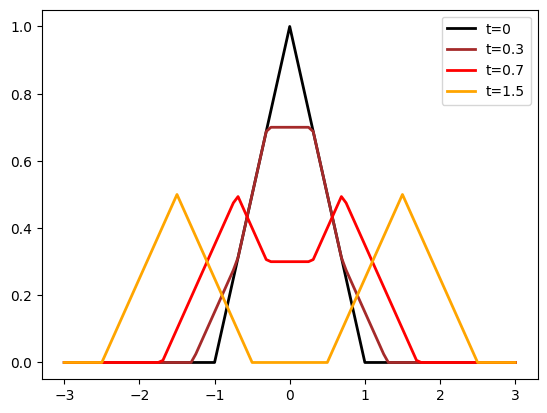

## Heat equation

\begin{align}
 u_{t} = \sigma \, u_{xx} \\
 u_{t} = \sigma \, \Delta u \\
\end{align}

We review the solution for a rod with $\sigma=1$ and length of $\pi$ as well as boundary conditions $u(0,t) = u(\pi,t) = 0$.

We assume that the initial condition is given as a Fourier expansion:
\begin{equation}
  u(x,0) = \sum_{k=1}^{\infty} a_{k} \sin kx, \quad 0 < x < \pi.
\end{equation}

Noting that $e^{-k^{2}t} \sin kx$ satisfy the heat equation, we get the solution
\begin{equation}
  u(x,t) = \sum_{k=1}^{\infty} a_{k} e^{-k^{2}t} \sin kx, \quad t \ge 0.
\end{equation}

Note that high-frequency components decay fast and for that reason, the diffusion process cannot be reversed: If $t < 0$, those high frequency components grow fast, leading to the divergence of the solution.

In [ ]:
numx = 101
x = np.linspace(0, np.pi, numx)
numt = 21
t = np.linspace(0, 2.0, numt)
u = np.zeros((numt, numx))
for i in range(numt):
    for j in range(numx):
        u[i,j] = np.exp(-t[i]) * np.sin(x[j]) + np.exp(-4.0*t[i])*np.sin(2.0*x[j])
fig, axs = plt.subplots(1,1)
axs.plot(x,u[0,:], color="black",   label="t={0:.1g}".format(t[0]))
axs.plot(x,u[5,:], color="brown",   label="t={0:.1g}".format(t[1]))
axs.plot(x,u[10,:], color="red",    label="t={0:.1g}".format(t[2]))
axs.plot(x,u[15,:], color="orange", label="t={0:.1g}".format(t[3]))
fig.legend(loc=(0.7,0.7))

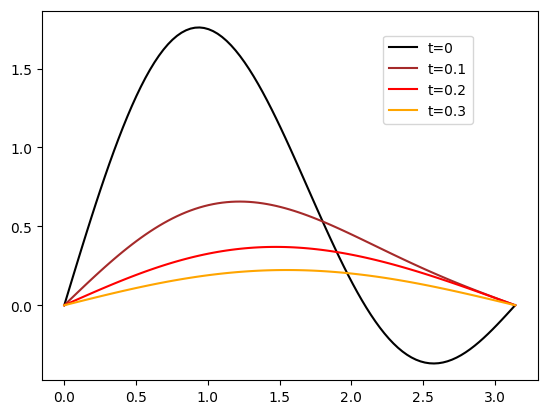

In [ ]:
nt = np.linspace(0, -2.0, numt)
nu = np.zeros((numt, numx))
for i in range(numt):
    for j in range(numx):
        nu[i,j] = np.exp(-nt[i]) * np.sin(x[j]) + np.exp(-4.0*nt[i])*np.sin(2.0*x[j])
fig, axs = plt.subplots(1,1)
axs.plot(x,nu[0,:], color="black",   label="t={0:.1g}".format(nt[0]))
axs.plot(x,nu[5,:], color="brown",   label="t={0:.1g}".format(nt[1]))
axs.plot(x,nu[10,:], color="red",    label="t={0:.1g}".format(nt[2]))
axs.plot(x,nu[15,:], color="orange", label="t={0:.1g}".format(nt[3]))
fig.legend(loc=(0.7,0.7))

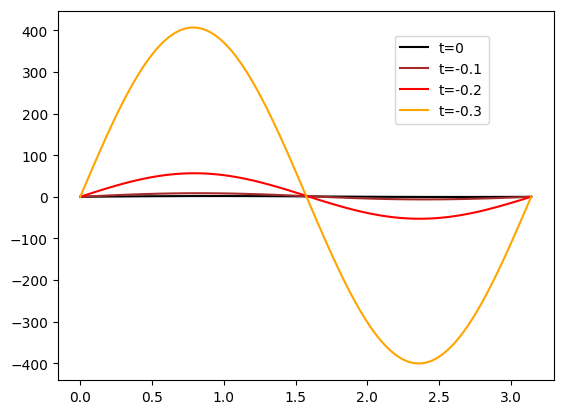